# Speed and Memory Bencmarking 

Just comparing language models on their performance on a specific task or a benchmark turns out to be no longer sufficient. We now must take care of the computational cost of a particular model for a given environment (RAM, CPU, GPU, TPU) in terms of memory usage and the speed. The computational cost of training and deploying to production for inference are two main values to be measured. Two classes of Transformer libary, PyTorchBenchmark and TensorFlowBenchmark, make it possible to benchmark models for both TensorFlow and PyTorch.

In [1]:
!nvidia-smi

Tue Apr 20 18:18:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch 
print(f"The GPU total memory is {torch.cuda.get_device_properties(0).total_memory /(1024**3)} GB") 

The GPU total memory is 15.8992919921875 GB


In [3]:
!pip install transformers
!pip install py3nvml==0.2.5

     |████████████████████████████████| 2.1MB 5.8MB/s 
     |████████████████████████████████| 3.3MB 21.6MB/s 
     |████████████████████████████████| 901kB 34.6MB/s 
     |████████████████████████████████| 61kB 3.4MB/s 


In [7]:

from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments
models= ["distilbert-base-uncased","distilroberta-base", "albert-base-v2"]
batch_sizes=[16]
sequence_lengths=[64, 128, 256, 512]

args = PyTorchBenchmarkArguments(  models=models, batch_sizes=batch_sizes, sequence_lengths=sequence_lengths)
benchmark = PyTorchBenchmark(args)

In [10]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments 
models= ["bert-base-uncased","distilbert-base-uncased","distilroberta-base", "distilbert-base-german-cased"] 
batch_sizes=[4] 
sequence_lengths=[32,64, 128, 256,512] 
args = PyTorchBenchmarkArguments(models=models, batch_sizes=batch_sizes, sequence_lengths=sequence_lengths, multi_process=False) 
benchmark = PyTorchBenchmark(args) 

In [11]:
# it takes time depending on your  CPU/GPU capacity and selection

In [12]:
results = benchmark.run()

1 / 4
2 / 4
3 / 4
4 / 4

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
      bert-base-uncased              4               32            0.008     
      bert-base-uncased              4               64            0.009     
      bert-base-uncased              4              128            0.015     
      bert-base-uncased              4              256             0.03     
      bert-base-uncased              4              512            0.062     
   distilbert-base-uncased           4               32            0.004     
   distilbert-base-uncased           4               64            0.004     
   distilbert-base-uncased           4              128            0.006     
   distilbert-base-uncased      

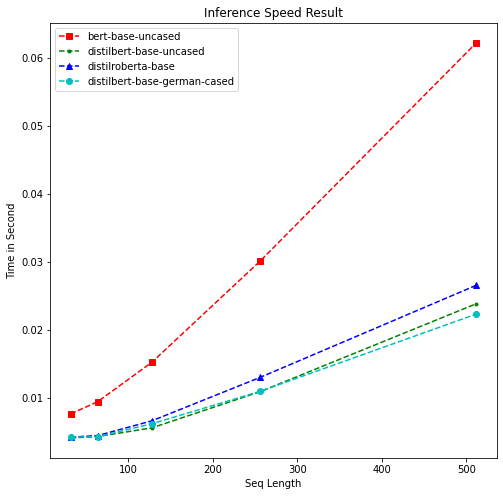

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,8)) 
t=sequence_lengths 
models_perf=[list(results.time_inference_result[m]['result'][batch_sizes[0]].values()) for m in models] 
plt.xlabel('Seq Length') 
plt.ylabel('Time in Second') 
plt.title('Inference Speed Result') 
plt.plot(t, models_perf[0], 'rs--', t, models_perf[1], 'g--.', t, models_perf[2], 'b--^', t, models_perf[3], 'c--o') 
plt.legend(models)  
plt.show() 